# Glass Identification Project

In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [8]:
df = pd.read_csv("https://raw.github.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


The Glass Identification dataset has 214 samples, each with an ID number and some chemical details. The goal is to figure out the type of glass(Target Variable), which can be one of seven kinds. Important details include how the glass bends light and the amounts of chemicals like Sodium (Na), Magnesium (Mg), and Silicon (Si). 

In [9]:
df.head(10)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
6,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
7,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
8,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1
9,11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24,1


# Exploratory Data Analysis

In [10]:
df.shape

(213, 11)

In [11]:
df.isnull().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


Total Entries: The dataset contains 213 samples.

Columns: There are 11 columns, including the ID number and chemical properties.

Data Types: Nine columns are of type float64, representing continuous chemical properties, and two columns are of type int64, representing the ID number and a classification label.

Non-Null Values: All columns have 213 non-null values, indicating there are no missing values in the dataset.

<Axes: >

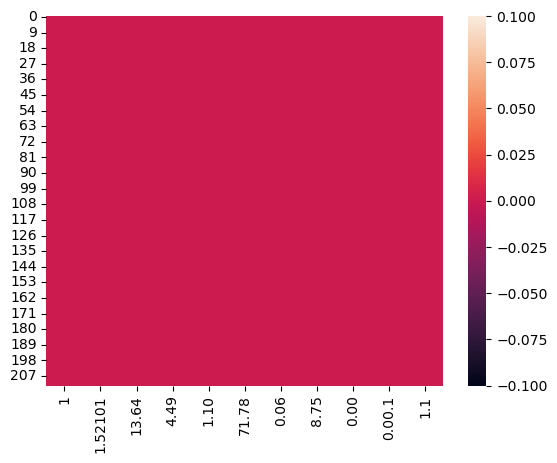

In [13]:
#lets visualise above data using heatmap
sns.heatmap(df.isnull())

# Description

In [14]:
df.describe()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000



The df.describe() function offers a summary of the numerical data, showing the count of non-null values, mean, standard deviation, minimum and maximum values, as well as the 25th, 50th (median), and 75th percentiles. This helps to understand the distribution, central tendency, and variability of the data.

In [15]:
df.skew()

1          0.000000
1.52101    1.639658
13.64      0.457318
4.49      -1.154323
1.10       0.900017
71.78     -0.744546
0.06       6.549276
8.75       2.040591
0.00       3.406749
0.00.1     1.747173
1.1        1.108861
dtype: float64

from above data we observe

0.000000: Indicates a perfectly symmetrical distribution.

1.639658: Suggests a right-skewed (positive skew) distribution, where the tail is longer on the right side.

0.457318: Indicates a slight right skew, but less pronounced than the previous value.

-1.154323: Indicates a left-skewed (negative skew) distribution, where the tail is longer on the left side.

0.900017: Suggests a moderate right skew.

-0.744546: Indicates a moderate left skew.

6.549276: Suggests a highly right-skewed distribution with a very long tail on the right.

2.040591: Indicates a right-skewed distribution, but less extreme than the previous value.

3.406749: Indicates a right-skewed distribution with a significant tail on the right.

1.747173: Suggests a moderate right skew.

1.108861: Indicates a right-skewed distribution, but less extreme.

# Data cleaning

In [16]:
# Rename columns
df.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [17]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


# visualization

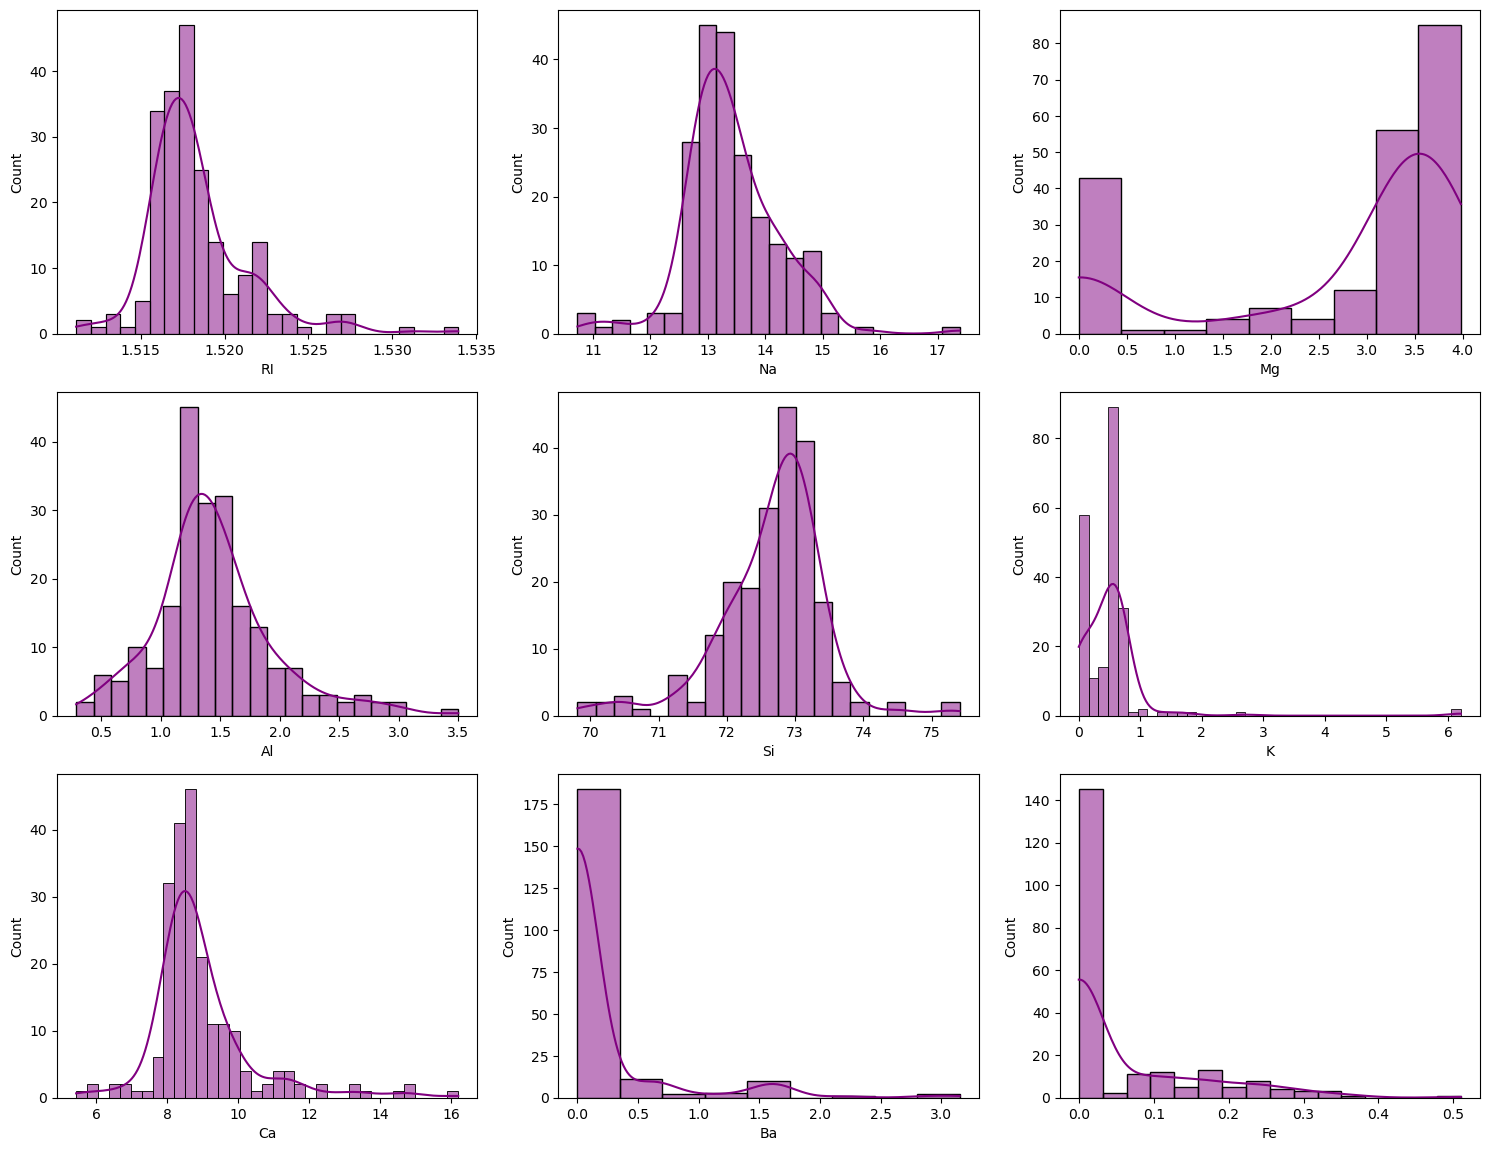

In [18]:
# Visualize distributions
plt.figure(figsize=(15, 15))
for i, col in enumerate(df.columns[1:-1]):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, color='purple')
plt.tight_layout()
plt.show()

RI (Refractive Index): The majority of the glass samples have a refractive index between 1.515 and 1.525.
The distribution is somewhat normal but slightly skewed to the right.

Na (Sodium): Sodium content is mostly concentrated around 13-15 weight percent.
There are a few outliers with higher sodium content.

Mg (Magnesium): Magnesium content has a bimodal distribution, with peaks around 0 and 4 weight percent.
This indicates two distinct groups within the dataset regarding magnesium content.

Al (Aluminum): Aluminum content shows a skewed distribution, with most values around 1.0-2.0 weight percent.

Si (Silicon): Silicon content is concentrated around 71-74 weight percent.
The distribution is slightly skewed to the right.

K (Potassium): Potassium content is highly skewed, with most values near 0 and a few outliers around 5-6 weight percent.

Ca (Calcium): Calcium content is fairly normally distributed around 8-10 weight percent.
There are some outliers with higher calcium content.

Ba (Barium):Most samples have very low barium content (close to 0), with a few outliers with higher values.

Fe (Iron):Iron content is also highly skewed, with most values near 0 and a few outliers.

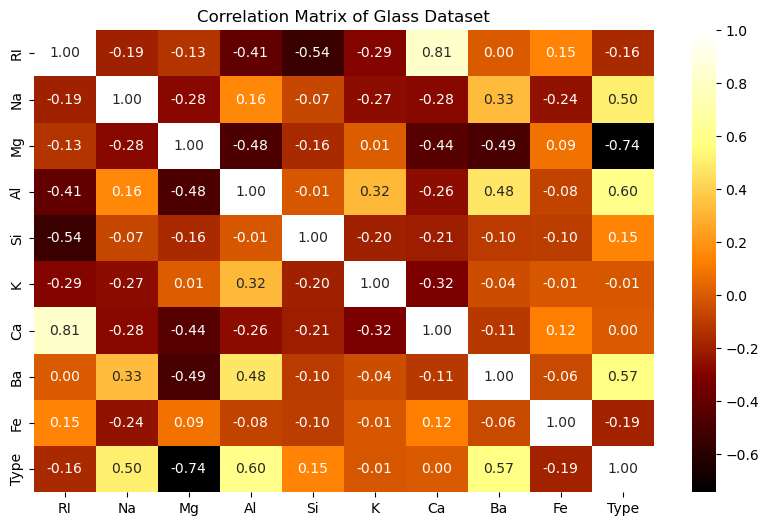

In [19]:
# Drop the Id column
df_without_id = df.drop(columns=['Id'])

#correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_without_id.corr(), annot=True, cmap='afmhot', fmt='.2f')
plt.title('Correlation Matrix of Glass Dataset')
plt.show()


Strong Positive Correlations:
Ca and RI (Refractive Index): There is a strong positive correlation (0.81) between Calcium and the refractive index.
Ba and Type: Barium has a significant positive correlation (0.57) with the type of glass.
Al and Type: Aluminum shows a positive correlation (0.60) with the type of glass.
Na and Type: Sodium also shows a positive correlation (0.50) with the type of glass.

Strong Negative Correlations:
Mg and Type: Magnesium has a strong negative correlation (-0.74) with the type of glass, indicating that higher levels of Magnesium are associated with certain glass types.
Al and Mg: There is a strong negative correlation (-0.48) between Aluminum and Magnesium.

The type of glass (Type) is influenced by various chemical properties, with significant correlations observed with Barium, Aluminum, Sodium, and Magnesium.

In [20]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [21]:
df['Type'].value_counts()

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

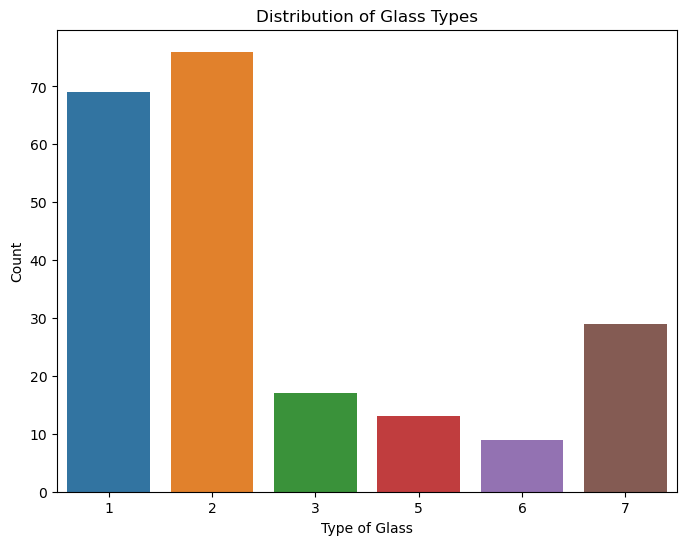

In [22]:
# Bar plot for Type of Glass
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Glass Types')
plt.xlabel('Type of Glass')
plt.ylabel('Count')
plt.show()


Glass with first two processed have higher count.The dataset is heavily skewed towards Type 1 and Type 2 glasses, which together constitute the majority of the samples.
Type 7 has a moderate representation, while Types 3, 5, and 6 are underrepresented.
This imbalance in the dataset could affect the performance of any machine learning models trained on this data, as models may have difficulty generalizing to underrepresented types. 

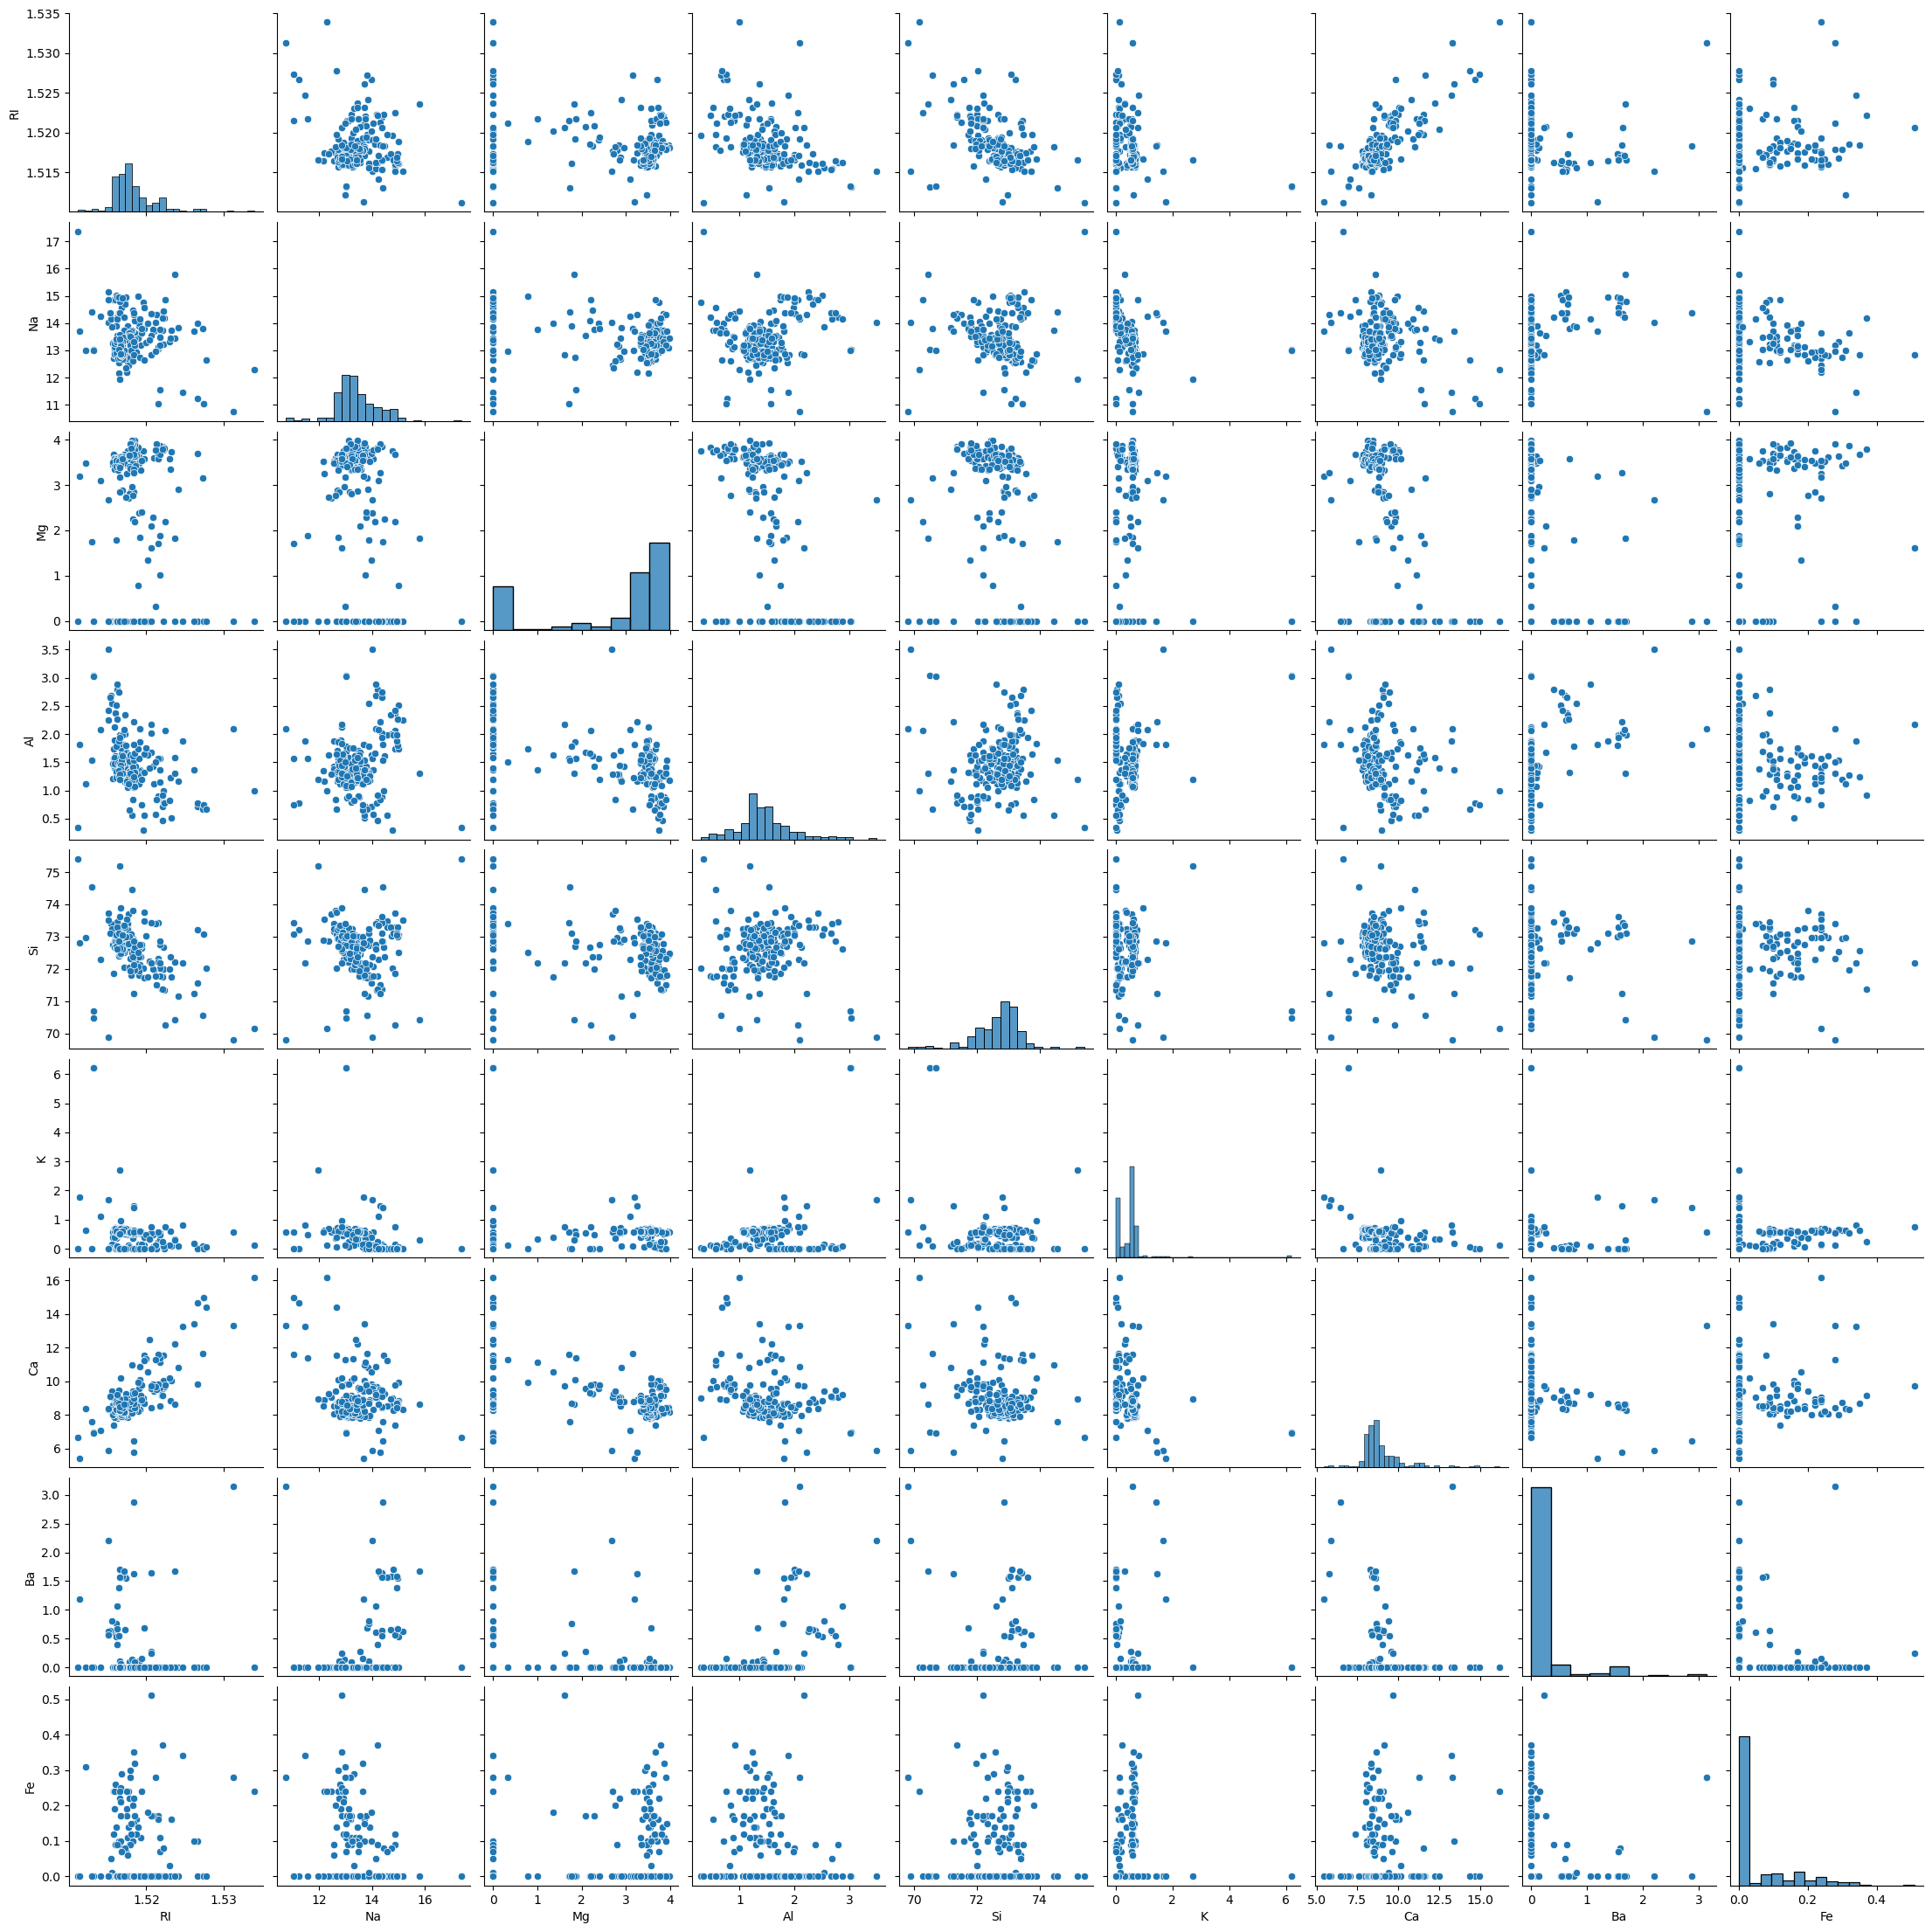

In [23]:
df_features = df.drop(columns=['Id', 'Type'])  # Drop 'Id' and 'Type'.

# pair plot 
sns.pairplot(df_features)
plt.show()

The pair plot of the Glass Identification dataset shows that Sodium (Na) and Silicon (Si) have wide ranges of values, while Barium (Ba) and Iron (Fe) are mostly low. It highlights some patterns and clusters that can help classify the glass types based on these chemical properties, indicating potential relationships useful for modeling.

In [24]:
print(df_features)

          RI     Na    Mg    Al     Si     K    Ca    Ba    Fe
0    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00
1    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00
2    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00
3    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00
4    1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26
..       ...    ...   ...   ...    ...   ...   ...   ...   ...
208  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00
209  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00
210  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00
211  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00
212  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00

[213 rows x 9 columns]


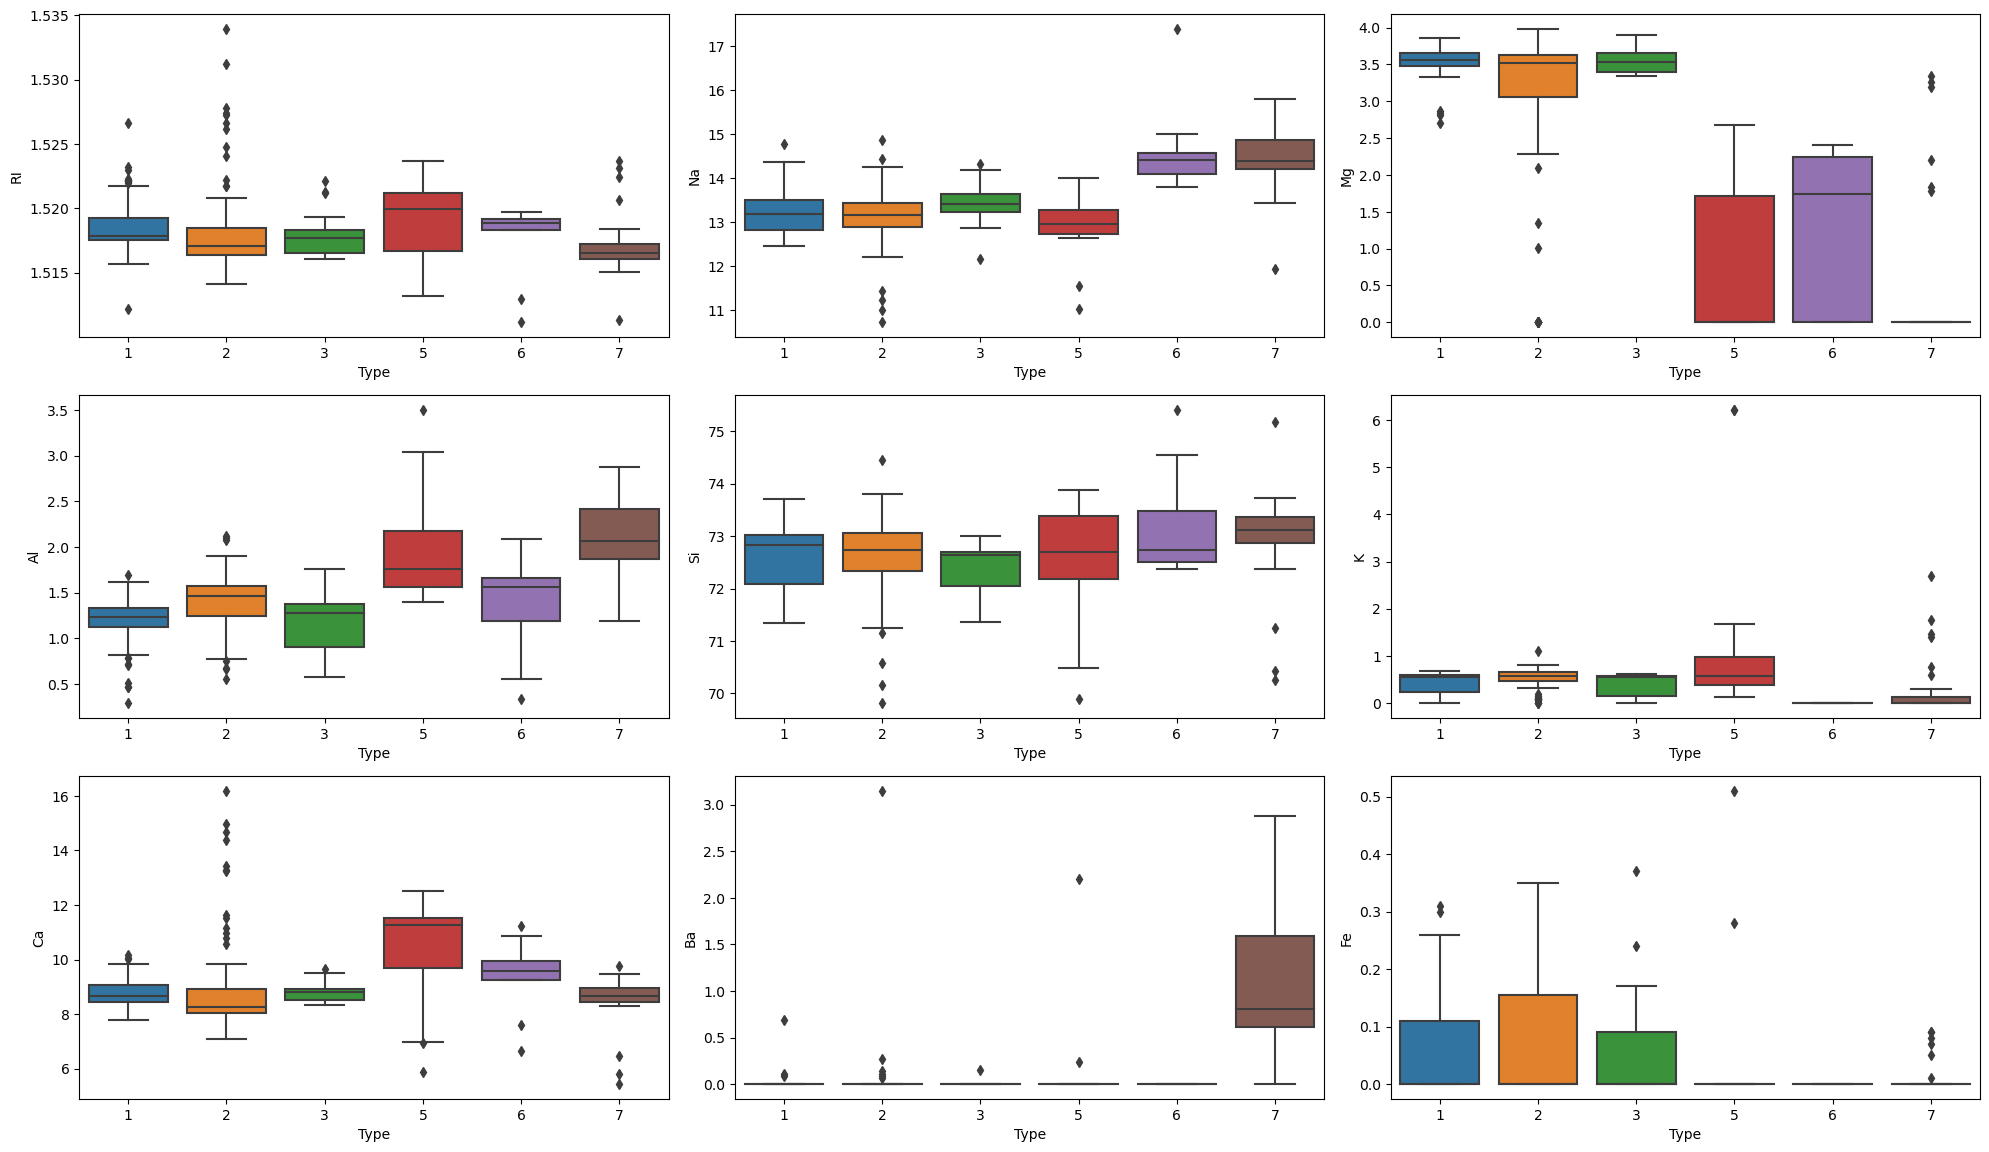

In [25]:
# Box plots 
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[1:-1]): # Exclude 'Id' and 'Glass Type'
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='Type', y=col, data=df)
plt.tight_layout()
plt.show()

Type 7 often stands out with higher concentrations of Na, Ba, and Fe, and lower concentrations of Mg and K.
Type 5 shows higher variability and median values in RI, Al, Ca, and K.
Types 1, 2, and 3 generally have similar distributions across most features, with some differences in Mg and K concentrations.
Type 6 shows lower concentrations of many elements compared to other types, especially in Mg, Ca, and Fe

# Remove Outliers

In [26]:
# Define df_features to include only the numeric columns
df_features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Calculate IQR
Q1 = df[df_features].quantile(0.25)
Q3 = df[df_features].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_cleaned = df[~((df[df_features] < lower_bound) | (df[df_features] > upper_bound)).any(axis=1)]

# Print original & cleaned DataFrame shape
print(f'Original dataset shape: {df.shape}')
print(f'Cleaned dataset shape: {df_cleaned.shape}')


Original dataset shape: (213, 11)
Cleaned dataset shape: (135, 11)


# Feature Engineering

In [27]:
#drop unnecessary column
df = df.drop(columns=['Id'])

In [28]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [29]:
# Split features and target variable
X = df_cleaned.drop(columns=['Type'], axis=1)
y = df_cleaned['Type'].apply(lambda y_value: 1 if y_value >= 5 else 0)

print(X.head())
print(y.head())


   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
1   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
2   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
3   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0
5   7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.0
0    0
1    0
2    0
3    0
5    0
Name: Type, dtype: int64


In [30]:
y.value_counts()

Type
0    128
1      7
Name: count, dtype: int64

# Smote

In [31]:
sm = SMOTE(k_neighbors=1)
X_resampled, y_resampled = sm.fit_resample(X, y)

We are using a method called SMOTE to make more examples of the smaller group in our data. This helps to make both groups more equal in size. The new data (X_resampled and y_resampled) now has a more even number of examples from each group.

In [32]:
y_resampled.value_counts()

Type
0    128
1    128
Name: count, dtype: int64

With SMOTE, we've successfully balanced our dataset. Now, both classes (0 and 1) have the same number of examples, 128 each. This balance helps improve the performance of our machine learning model, making it better at distinguishing between the two classes.

# Splitting the Data

In [33]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model Training and Evaluation

In [34]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [35]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [36]:
# Predict and evaluate
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        28

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

Accuracy Score: 1.0


The Logistic Regression model performed perfectly on the test data. It correctly predicted all instances for both classes, achieving 100% accuracy. This means the model didn't make any mistakes. 

In [37]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [38]:
# Predict and evaluate
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        28

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

Accuracy Score: 1.0


The Random Forest Classifier achieved perfect results as well, with an accuracy of 100%. It successfully classified all instances of both classes correctly. This indicates that the Random Forest model is also very effective on this dataset.

In [39]:
#SVC 
svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [40]:
# Predict and evaluate
y_pred_svc = svc.predict(X_test_scaled)
print("Support Vector Classifier:")
print(classification_report(y_test, y_pred_svc))
print("Accuracy Score:", accuracy_score(y_test, y_pred_svc))

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        28

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

Accuracy Score: 1.0


The Support Vector Classifier (SVC) also performed perfectly on the test data, with an accuracy of 100%. It correctly predicted every instance for both classes. This suggests that the SVC model is very effective on this data.

# Hyperparameter Tuning

In [45]:
# parameter grids for each model
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear']
}

param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


In [46]:
# Hyperparameter tuning for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_search_lr.fit(X_train_scaled, y_train)
best_lr = grid_search_lr.best_estimator_

In [47]:
# Hyperparameter tuning for Support Vector Classifier
grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5)
grid_search_svc.fit(X_train_scaled, y_train)
best_svc = grid_search_svc.best_estimator_

In [48]:
# Hyperparameter tuning for Random Forest Classifier
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)
best_rf = grid_search_rf.best_estimator_

In [50]:
# Evaluate the tuned models
tuned_models = {
    "Logistic Regression": best_lr,
    "Support Vector Classifier": best_svc,
    "Random Forest Classifier": best_rf
}

In [51]:
for model_name, model in tuned_models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"{model_name} Performance:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}\n")

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        28

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

Accuracy Score: 1.0

Support Vector Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        28

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

Accuracy Score: 1.0

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        28

    accuracy                  

# Cross-Validation

In [56]:
#cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

we use cross validation  to ensure that the models are not overfitting and the results are consistent across different subsets of the data.

In [57]:
# Evaluate each tuned model using cross-validation
for model_name, model in tuned_models.items():
    # Cross-validation scores
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"{model_name} Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}\n")

Logistic Regression Cross-Validation Scores: [1.         1.         1.         1.         0.96296296]
Mean Accuracy: 0.9925925925925926
Standard Deviation: 0.014814814814814836

Support Vector Classifier Cross-Validation Scores: [0.96296296 0.96296296 0.96296296 0.92592593 0.92592593]
Mean Accuracy: 0.9481481481481481
Standard Deviation: 0.01814436846506055

Random Forest Classifier Cross-Validation Scores: [1.         1.         1.         1.         0.96296296]
Mean Accuracy: 0.9925925925925926
Standard Deviation: 0.014814814814814836



Overall, Logistic Regression and Random Forest Classifier show the best and most stable performance, while the Support Vector Classifier has slightly lower accuracy and higher variability.

In [58]:
# cross-validation scores  comparison
cv_scores = {
    "Logistic Regression": [1.0, 1.0, 1.0, 1.0, 0.96296296],
    "Support Vector Classifier": [0.96296296, 0.96296296, 0.96296296, 0.92592593, 0.92592593],
    "Random Forest Classifier": [1.0, 1.0, 1.0, 1.0, 0.96296296]
}

# Calculate mean and standard deviation for each model
for model_name, scores in cv_scores.items():
    mean_score = np.mean(scores)
    std_dev = np.std(scores)
    print(f"{model_name}: Mean Accuracy = {mean_score}, Standard Deviation = {std_dev}")


Logistic Regression: Mean Accuracy = 0.992592592, Standard Deviation = 0.014814815999999986
Support Vector Classifier: Mean Accuracy = 0.9481481479999999, Standard Deviation = 0.01814436501763058
Random Forest Classifier: Mean Accuracy = 0.992592592, Standard Deviation = 0.014814815999999986


Hence we found logistic regression & Random Forest have slightely better results.so we can move furthur with any of the two.

In [59]:
# Select the best model 
best_model_name = "Random Forest Classifier"
best_model = best_rf
print(f"Selected Model: {best_model_name}")

Selected Model: Random Forest Classifier


In [60]:
#final evaluation on a separate test set
y_pred_final = best_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, y_pred_final)
final_classification_report = classification_report(y_test, y_pred_final)

print("Final Model Evaluation:")
print(final_classification_report)
print(f"Final Accuracy: {final_accuracy}")

Final Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        28

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

Final Accuracy: 1.0


# Save the model

In [61]:
model_filename = "best_model_random_forest.pkl"
joblib.dump(best_model, model_filename)
print(f"Model saved as {model_filename}")


Model saved as best_model_random_forest.pkl


# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [249]:
df = pd.read_csv("https://raw.github.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193



The dataset consists of student grades obtained in various courses over four years, represented by columns such as "PH-121", "HS-101", "CY-105", etc. These grades are the features used to predict the target variable, which is the "CGPA". The "Seat No" column serves as an identifier for each student and is not used as a feature in the prediction model.

In [250]:
df.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


# Exploratory Data Analysis

In [251]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

From the above data we can see a lot of missing values.

In [252]:
df.isnull().sum().sum()

425

<Axes: >

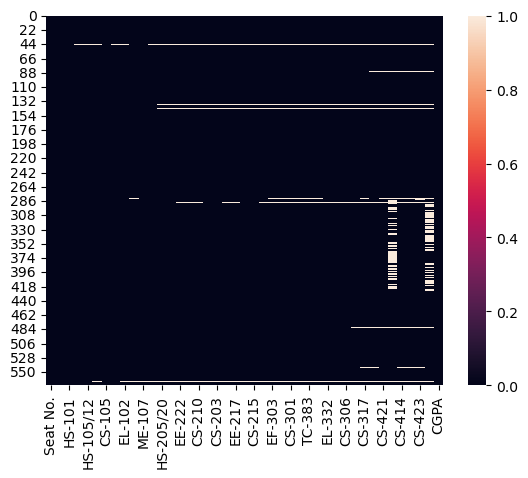

In [253]:
#lets visualise above data using heatmap
sns.heatmap(df.isnull())

total missing values are 425.

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

The dataset consists of 571 student entries with 43 columns, including 42 columns representing grades in various courses (categorical data) and one column for the cumulative GPA (CGPA), which is numerical. Some columns have missing values. To predict CGPA, grades need to be encoded into numerical values, and strategies for handling missing data should be implemented.

# Handle missing values

In [255]:
# Assuming 'F' for missing grades

df.fillna('F', inplace=True) 

In [256]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("Categorical Columns:", categorical_cols)

print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412'],
      dtype='object')
Numerical Columns: Index(['CGPA'], dtype='object')


In [257]:
# Drop the 'Seat No.' column
df.drop(columns=['Seat No.'], inplace=True)

# Description

In [258]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


# visualisation

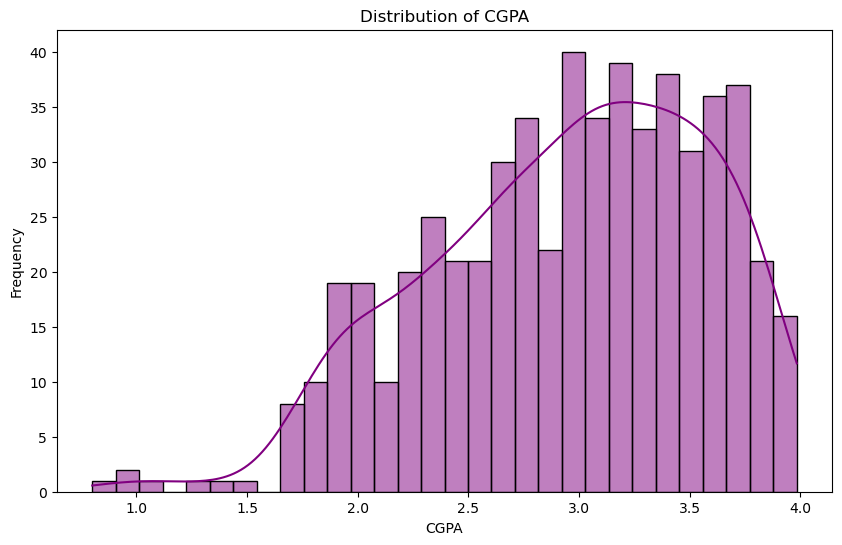

In [259]:
#Distribution of CGPA with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['CGPA'], kde=True, bins=30, color='purple')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

The CGPA values range from about 1.0 to 4.0, showing a wide spread of student performance, where 4.0 represents an A+ grade (excellent performance) and 1.0 indicates lower marks.

 The distribution of CGPA is approximately normal with a slight positive skew, indicating that most students have CGPAs clustered around the mean, with fewer students having very low.

# Encode Grades to Numerical Values

In [262]:
# Encoding grades into numerical values
grade_mapping = {
    'A+': 4.0, 'A': 4.0, 'A-': 3.7,
    'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7,
    'D+': 1.3, 'D': 1.0, 'F': 0.0,
}

# Applying the grade mapping to all columns except 'Seat No.' and 'CGPA'
for col in df.columns:
    if col not in ['Seat No.', 'CGPA']:
        df[col] = df[col].map(grade_mapping)    



In [263]:
df.skew()

PH-121      -0.820024
HS-101      -0.208545
CY-105      -1.324557
HS-105/12   -0.540671
MT-111      -0.777455
CS-105      -1.240521
CS-106      -0.927613
EL-102      -0.773803
EE-119      -0.792698
ME-107      -0.349151
CS-107      -0.606866
HS-205/20   -1.642536
MT-222      -0.389158
EE-222      -1.147013
MT-224      -0.698725
CS-210      -1.166991
CS-211      -0.333165
CS-203      -0.562331
CS-214      -0.214897
EE-217      -1.156963
CS-212      -0.660211
CS-215      -0.385747
MT-331      -0.994047
EF-303      -0.550190
HS-304      -0.855316
CS-301      -0.773047
CS-302      -1.218164
TC-383      -0.634430
MT-442      -1.371063
EL-332      -0.873957
CS-318      -0.635751
CS-306      -0.853425
CS-312      -0.588910
CS-317      -0.591698
CS-403      -1.024586
CS-421      -0.600936
CS-406      -1.168487
CS-414      -2.121923
CS-419      -1.215163
CS-423      -1.000691
CS-412      -1.256105
CGPA        -0.497203
dtype: float64

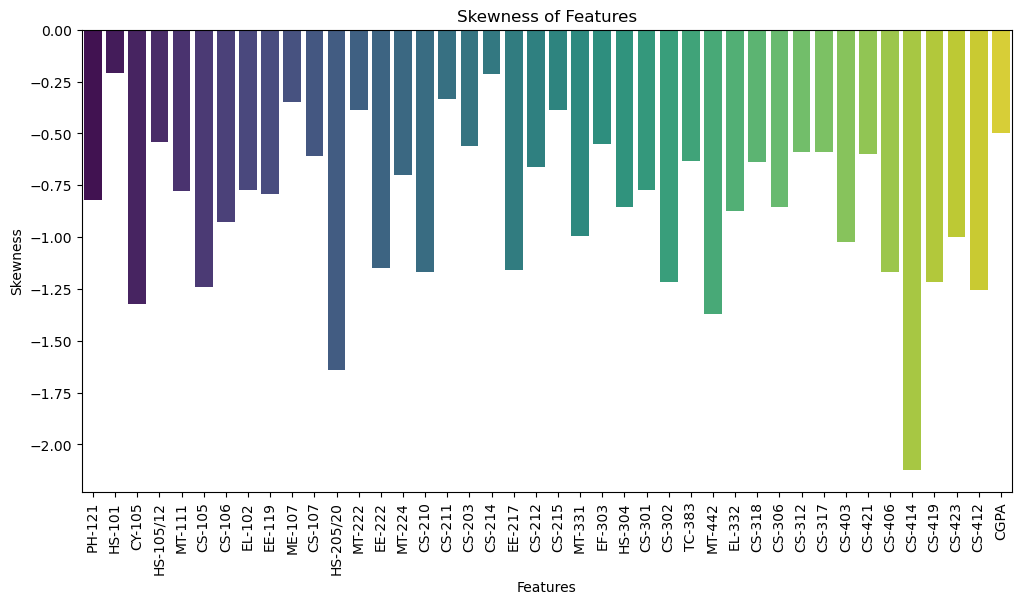

In [264]:
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness.values, palette='viridis')
plt.title('Skewness of Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.show()

Most features have negative skewness, meaning their distributions have longer tails on the left. Features like HS-304, CS-210, CS-214, CS-403, and CS-414 are highly skewed, showing that most grades are high. Features like CS-318 and CS-317 have low skewness, indicating a more even distribution of grades. CGPA also shows slight negative skewness, meaning more students have higher CGPAs. 

In [265]:
# correlation of each column with CGPA
correlations = df.corr()['CGPA'].drop('CGPA') 

In [266]:
# Converted to DataFrame
correlation_df = correlations.reset_index()
correlation_df.columns = ['Course', 'Correlation with CGPA']

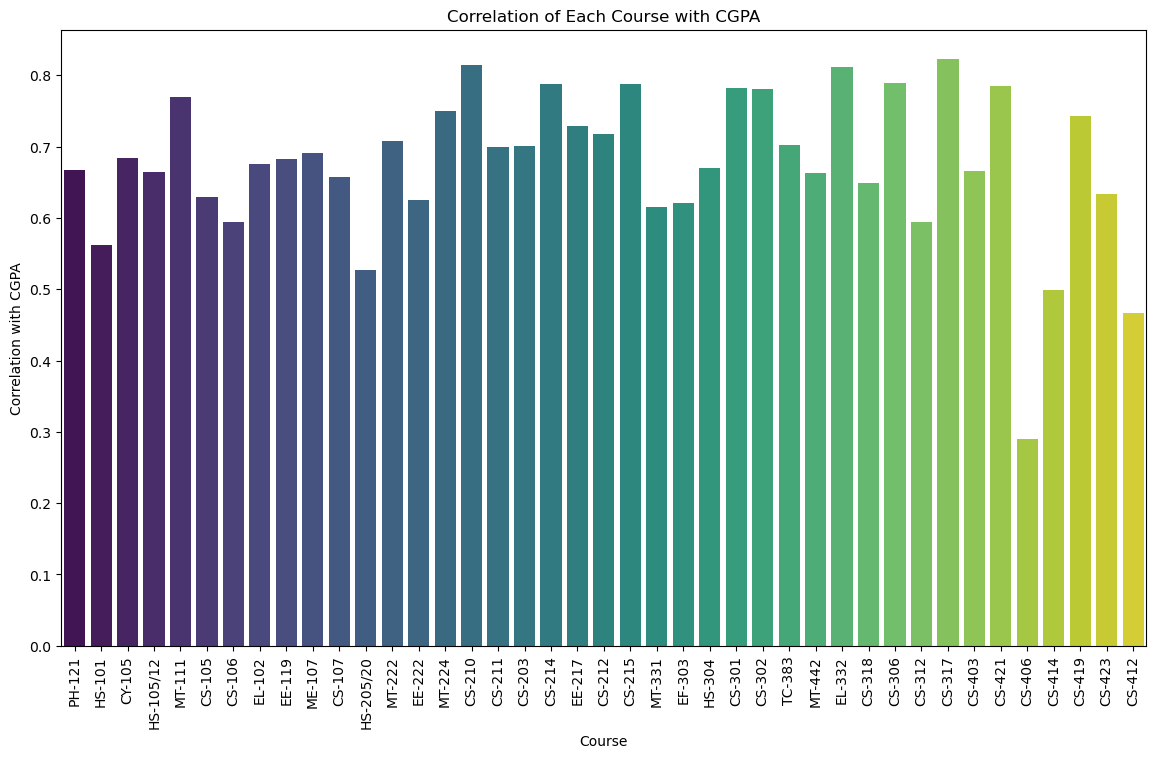

In [267]:
# bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Course', y='Correlation with CGPA', data=correlation_df, palette='viridis')
plt.xticks(rotation=90)  
plt.title('Correlation of Each Course with CGPA')
plt.xlabel('Course')
plt.ylabel('Correlation with CGPA')
plt.show()

Above plot shows contribution of each course in the CGPA

# Feature engineering

In [268]:
# Features and label
X = df.drop(columns=['CGPA']) 
y = df['CGPA'] 

In [269]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling

In [270]:
#Initialize the scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Machine learning model

In [271]:
#linear regression
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled) # Predict on the test set


mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression - Mean Squared Error: {mse_lin}")
print(f"Linear Regression - R^2 Score: {r2_lin}")

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values